# First Model-on 11GB Data Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import sklearn
import tensorflow as tf
import keras
from PIL import Image, ImageOps

Using TensorFlow backend.


Define a path function so all members in the group can use this code. Just change the USER variable.

In [2]:
USER = "Alex"

if USER == "Gabi":
    PATH = "TBD"
elif USER == "Alex":
    PATH = "C:/Users/Pedro/Desktop/CheXpert-v1.0-small"
elif USER == "Vita":
    PATH = "TBD"
else:
    PATH = input("What is the path to the CheXpert data set?")

Load the dataframe and clean/process the data

In [3]:
df = pd.read_csv(PATH + "/train.csv")
df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,CheXpert-v1.0-small/train/patient00001/study1/...,Female,68,Frontal,AP,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,1.0
1,CheXpert-v1.0-small/train/patient00002/study2/...,Female,87,Frontal,AP,NaN,NaN,-1.0,1.0,NaN,-1.0,-1.0,NaN,-1.0,NaN,-1.0,NaN,1.0,NaN
2,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Frontal,AP,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
3,CheXpert-v1.0-small/train/patient00002/study1/...,Female,83,Lateral,NaN,NaN,NaN,NaN,1.0,NaN,NaN,-1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN
4,CheXpert-v1.0-small/train/patient00003/study1/...,Male,41,Frontal,AP,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


C:/Users/Pedro/Desktop/CheXpert-v1.0-small/train/patient00001/study1/view1_frontal.jpg


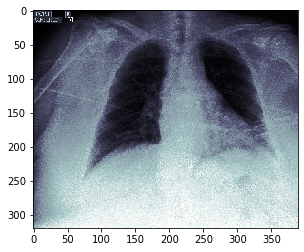

In [4]:
# Function for editing the image file paths
def edit_urls(url):
    pieces = url.split("/")
    newurl = ""
    
    #removing the previous path "CheXpert-v1.0-small" and including PATH
    for i, piece in enumerate(pieces):
        if i > 0:
            newurl += "/" + piece
        elif i == 0:
            newurl += PATH
    
    return newurl

#testing
tester_url = edit_urls(df.iloc[0]["Path"])
print(tester_url)

xray = Image.open(tester_url)
plt.imshow(xray, cmap = "bone")
plt.show()

In [5]:
remove_NaN_df = df.fillna(value = 0)
remove_NaN_df["Path"] = remove_NaN_df["Path"].apply(edit_urls)

remove_NaN_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,-1.0,1.0,0.0,-1.0,-1.0,0.0,-1.0,0.0,-1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,-1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
U_Ones_df = remove_NaN_df.replace(-1, 1)
U_Zeros_df = remove_NaN_df.replace(-1, 0)

U_Ones_df.head()

,Path,Sex,Age,Frontal/Lateral,AP/PA,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
0,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,68,Frontal,AP,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,87,Frontal,AP,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Frontal,AP,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Female,83,Lateral,0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,Male,41,Frontal,AP,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
U_Ones_PA_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "PA")]
U_Ones_AP_df_temp = U_Ones_df[(U_Ones_df["Frontal/Lateral"] == "Frontal") & (U_Ones_df["AP/PA"] == "AP")]
U_Ones_lateral_df_temp = U_Ones_df[U_Ones_df["Frontal/Lateral"] == "Lateral"]

U_Ones_PA_df = U_Ones_PA_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_AP_df = U_Ones_AP_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
U_Ones_lateral_df = U_Ones_lateral_df_temp.iloc[:, [0,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]

U_Ones_PA_df.head()

,Path,No Finding,Enlarged Cardiomediastinum,Cardiomegaly,Lung Opacity,Lung Lesion,Edema,Consolidation,Pneumonia,Atelectasis,Pneumothorax,Pleural Effusion,Pleural Other,Fracture,Support Devices
5,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
16,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
18,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,C:/Users/Pedro/Desktop/CheXpert-v1.0-small/tra...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [8]:
# Create a list of the various pathologies (targets). This will come in handy later. 
pathologies = [col for col in U_Ones_PA_df.iloc[:, 1:].columns]
print(pathologies)

['No Finding', 'Enlarged Cardiomediastinum', 'Cardiomegaly', 'Lung Opacity', 'Lung Lesion', 'Edema', 'Consolidation', 'Pneumonia', 'Atelectasis', 'Pneumothorax', 'Pleural Effusion', 'Pleural Other', 'Fracture', 'Support Devices']


In [9]:
print(len(U_Ones_PA_df))
print(len(U_Ones_AP_df))
print(len(U_Ones_lateral_df))

29420
161590
32387


Here we split the dataset into a training set and a test set. We are looking at frontal PA X-rays where uncertain values are classified as positive. 

In [10]:
# from sklearn.model_selection import train_test_split

# xray_train, xray_test, pathology_train, pathology_test = train_test_split(
#     U_Ones_PA_df["Path"], 
#     U_Ones_PA_df.iloc[:, 5:], 
#     test_size = 0.2, 
#     random_state = 42
# )

# print(xray_train.shape)
# print(pathology_train.shape)

from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(
    # U_Ones_PA_df,
    U_Ones_df,
    test_size = 0.2, 
    random_state = 42
)

print(train_df.shape)
print(test_df.shape)

(178731, 19)
(44683, 19)


Now we want to use ImageDataGenerator to process the x-rays into a format that the model can use.

In [11]:
from keras.preprocessing.image import ImageDataGenerator

# Normalize color information
datagen = ImageDataGenerator(rescale = 1./255)

# For the classifier to work, for some reason it has to be in string format
train_df[pathologies] = train_df[pathologies].astype(str)
test_df[pathologies] = test_df[pathologies].astype(str)

# print(train_df.dtypes)

train_generator = datagen.flow_from_dataframe(
    train_df,
    directory = None,
    x_col = "Path",
    y_col = "Pleural Effusion", # Change later as needed
    target_size = (320, 320), # 320 x 320 pixels
    color_mode = "grayscale",
    classes = None,
    class_mode = "binary",
    batch_size = 16,
    shuffle = True,
    seed = None,
    # save_to_dir='', 
    # save_prefix='test', 
    # save_format='png', 
    subset=None, 
    # interpolation='nearest', 
    drop_duplicates=True
)

test_generator = datagen.flow_from_dataframe(
    test_df,
    directory = None,
    x_col = "Path",
    y_col = "Pleural Effusion", # Change later as needed
    target_size = (320, 320), # 320 x 320 pixels
    color_mode = "grayscale",
    classes = None,
    class_mode = "binary",
    batch_size = 16,
    shuffle = True,
    seed = None,
    # save_to_dir='', 
    # save_prefix='test', 
    # save_format='png', 
    subset=None, 
    # interpolation='nearest', 
    drop_duplicates=True
)

c:\users\pedro\appdata\local\programs\python\python36\lib\site-packages\pandas\core\frame.py:3391: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


Found 178731 validated image filenames belonging to 2 classes.
Found 44683 validated image filenames belonging to 2 classes.


In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (320, 320, 1)),
    tf.keras.layers.Dense(160, activation = tf.nn.relu),
    tf.keras.layers.Dense(2, activation = tf.nn.softmax)
])

model.compile(
    loss = "sparse_categorical_crossentropy",
    optimizer = tf.train.AdamOptimizer(),
    metrics = ["accuracy"]
)

W0716 21:53:51.652206 14248 deprecation.py:506] From c:\users\pedro\appdata\local\programs\python\python36\lib\site-packages\tensorflow\python\ops\init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [13]:
"""
Note for tomorrow: when the images are 320 x 320 pixels, the model overfits, as evidenced by 
large swings in the validation accuracy by epoch. 
"""

history = model.fit_generator(
    train_generator,
    steps_per_epoch = 30,
    epochs = 5,
    validation_data = test_generator,
    validation_steps = 15
)

Epoch 1/5
30/30 [==============================] - 9s 292ms/step - loss: 17.9612 - acc: 0.4854 - val_loss: 5.1817 - val_acc: 0.4583
Epoch 2/5
30/30 [==============================] - 6s 214ms/step - loss: 2.5141 - acc: 0.5458 - val_loss: 1.0415 - val_acc: 0.5917
Epoch 3/5
30/30 [==============================] - 6s 210ms/step - loss: 1.4716 - acc: 0.6229 - val_loss: 1.3723 - val_acc: 0.5875
Epoch 4/5
30/30 [==============================] - 7s 219ms/step - loss: 1.7255 - acc: 0.6229 - val_loss: 3.1155 - val_acc: 0.5500
Epoch 5/5
30/30 [==============================] - 6s 193ms/step - loss: 1.8149 - acc: 0.5354 - val_loss: 1.7452 - val_acc: 0.5333


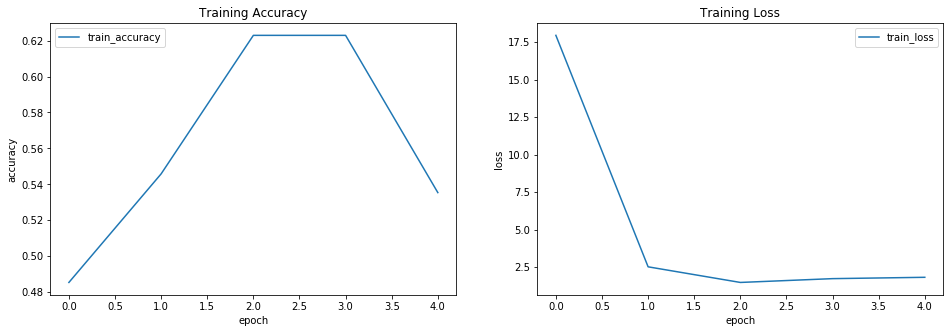

In [14]:
#evaluates model
def model_eval(history):
    plt.figure(figsize=(16,5))
    plt.subplot(1,2,1)
    plt.plot(history.history['acc'])
    plt.title('Training Accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train_accuracy'], loc='best')
    plt.subplot(1,2,2)
    plt.plot(history.history['loss'])
    plt.title('Training Loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train_loss'], loc='best')
    
model_eval(history)

In [15]:
predictions = model.predict(test_generator)
predicted_label = np.argmax(predictions, axis = 1)
print(predictions.shape)
print(predictions[:20])

(44683, 2)
[[8.2021588e-01 1.7978410e-01]
 [1.5643578e-02 9.8435646e-01]
 [6.5278852e-01 3.4721151e-01]
 [2.3452817e-02 9.7654724e-01]
 [1.0089432e-03 9.9899107e-01]
 [1.8949011e-02 9.8105097e-01]
 [1.1213431e-02 9.8878658e-01]
 [4.4517000e-03 9.9554825e-01]
 [1.8127593e-01 8.1872404e-01]
 [1.0369058e-02 9.8963100e-01]
 [3.3091344e-02 9.6690857e-01]
 [3.8675305e-01 6.1324698e-01]
 [5.8417898e-01 4.1582102e-01]
 [2.6746283e-03 9.9732530e-01]
 [5.3365570e-01 4.6634433e-01]
 [1.5633405e-03 9.9843663e-01]
 [3.0163643e-03 9.9698359e-01]
 [6.1673131e-02 9.3832684e-01]
 [9.9947816e-01 5.2187726e-04]
 [4.4891691e-01 5.5108303e-01]]


In [16]:
import numpy as np

class_names = ["Sick", "Not Sick"]

# Utility function to plot image and actual label

def plot_image(i, predictions_array, labels, img):
    prediction = predictions_array[i]
    true_label = int(labels[i])

    # Remove grid, x and y axis ticks from the chart
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    # Plot the image
    plt.imshow( img[i, :, :, 0], cmap="gray")

    # Set predicted_label to the highest value from the prediction result
    if prediction[0] > prediction[1]:
        predicted_label = 0
    else:
        predicted_label = 1
        predicted_label = int(round(predicted_label))

    # Set color to blue on a correct prediction, otherwise set color to red
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    # Print the predicted label, confidence number, and actual label
    plt.xlabel("{} ({:2.0f}%) vs {}".format(class_names[predicted_label],
                                100*np.max(prediction),
                                class_names[true_label]),
                                color=color)


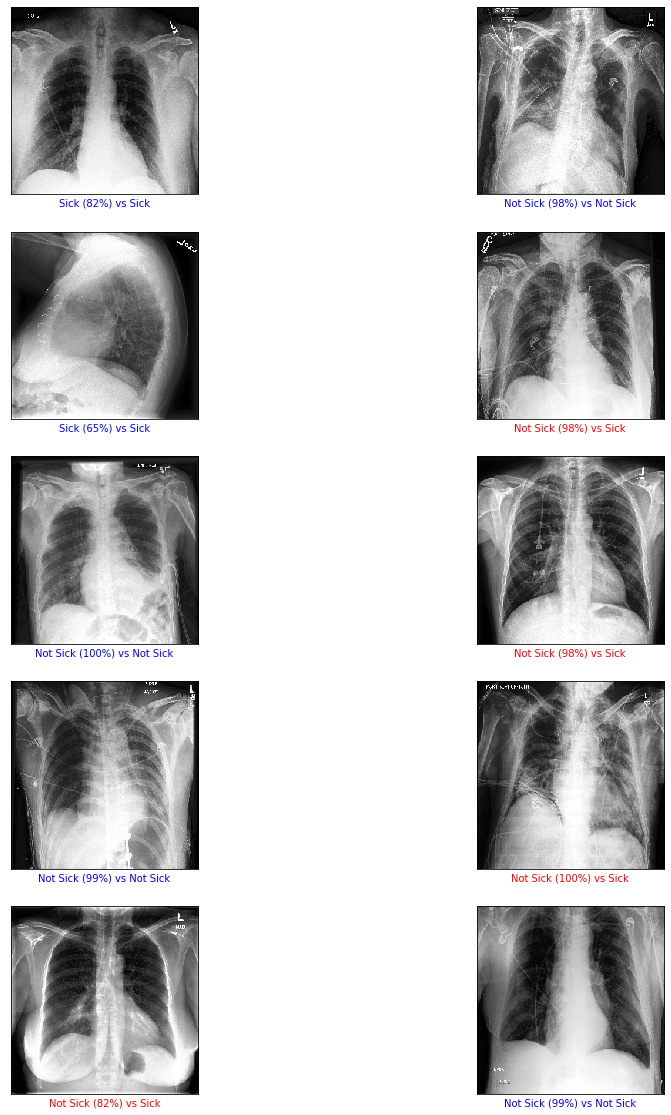

In [17]:
num_rows = 5
num_cols = 2
num_images = num_rows*num_cols

plt.figure(figsize=(4*2*num_cols, 4*num_rows))

for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions, test_generator[0][1], test_generator[0][0])

After this point, we have a working model. Now we want to evaluate how well it performs. For this we need to get the precision, recall/sensitivity, specificity, ROC and AUC. These metrics will give us the information that we need to evaluate our model.

First, let's start with getting a confusion matrix. 

In [18]:
print(predictions[:10].T[0])
print(np.array(test_df["Pleural Effusion"])[:10])

[0.8202159  0.01564358 0.6527885  0.02345282 0.00100894 0.01894901
 0.01121343 0.0044517  0.18127593 0.01036906]
['0.0' '0.0' '1.0' '0.0' '0.0' '1.0' '0.0' '1.0' '1.0' '0.0']


In [19]:
from sklearn.metrics import confusion_matrix

"""
We need to alter the predictions array to match the test targets.
Right now the predictions array has "1" for positive for disease and
"0" for negative for disease. The test targets has "1" for disease
not present and "0" for disease present.

After altering the array and converting to boolean values, True 
corresponds to sick and False corresponds sick. 
"""

threshold = 0.5 # Threshold set to 0.5: below 0.5 is classified as sick

altered_predictions = np.ones(len(predictions)) - predictions.T[0]
print(altered_predictions[:10])

# Convert the values of altered_predictions to boolean values
predicts = (altered_predictions > threshold)
print(predicts[:10])

print(np.array(test_df["Pleural Effusion"].astype(float))[:10])

# Convert the values of test to boolean values
actuals = (np.array(test_df["Pleural Effusion"].astype(float)) > threshold)
print(actuals[:10])

cm = confusion_matrix(predicts, actuals)

print(cm)

[0.17978412 0.98435642 0.34721148 0.97654718 0.99899106 0.98105099
 0.98878657 0.9955483  0.81872407 0.98963094]
[False  True False  True  True  True  True  True  True  True]
[0. 0. 1. 0. 0. 1. 0. 1. 1. 0.]
[False False  True False False  True False  True  True False]
[[ 3037  2356]
 [22154 17136]]


In [20]:
"""
This is a test to see how scikit learn organizes their confusion matrices
"""

cm_test = confusion_matrix(predicts[:10], actuals[:10])
print(predicts[:10])
print(actuals[:10])
print("")
print(cm_test)

[False  True False  True  True  True  True  True  True  True]
[False False  True False False  True False  True  True False]

[[1 1]
 [5 3]]


Now we print out the metrics we want.

In [21]:
from sklearn.metrics import classification_report

print(classification_report(actuals, predicts))

              precision    recall  f1-score   support

       False       0.56      0.12      0.20     25191
        True       0.44      0.88      0.58     19492

    accuracy                           0.45     44683
   macro avg       0.50      0.50      0.39     44683
weighted avg       0.51      0.45      0.37     44683



In [22]:
"""
Metrics calculated manually here because scikit learn can be
pretty dumb sometimes. 
"""

TP, FP, FN, TN = cm.ravel()
sensitivity = TP / (TP + FN) # This is also recall
specificity = TN / (TN + FP)
precision = TP / (TP +FP)
accuracy = (TP + TN) / (TP + TN + FP +FN)
F1 = 2 / ((1 / precision) + (1 / sensitivity))

# print(TP)
# print(TN)
# print(FP)
# print(FN)

print("")
print("Sensitivity/recall:  {}".format(sensitivity))
print("Specificity:         {}".format(specificity))
print("Precision:           {}".format(precision))
print("Accuracy:            {}".format(accuracy))
print("F1 score:            {}".format(F1))


Sensitivity/recall:  0.12055892977650748
Specificity:         0.8791298994459266
Precision:           0.563137400333766
Accuracy:            0.45146923886041673
F1 score:            0.19860057546429502


Now it's time to get the ROC curve and AUC score.

In [23]:
from sklearn.metrics import roc_curve, roc_auc_score

FPR, TPR, thresholds = roc_curve(actuals, predicts, pos_label = True, drop_intermediate = False)
AUC = roc_auc_score(actuals, predicts)

print("Number of thresholds: {}".format(len(thresholds)))
print("AUC: {}".format(AUC))

Number of thresholds: 3
AUC: 0.49984441461121704


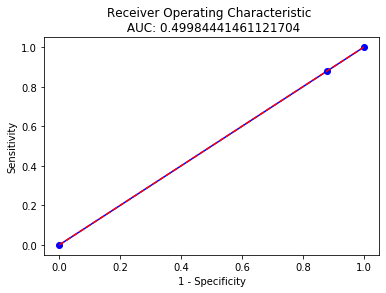

In [24]:
# plt.figure().add_axes([0.1, 0.1, 0.4, 0.8])

plt.plot(FPR, TPR, "bo")
plt.plot(FPR, TPR, "b-")
plt.plot([0, 1], [0, 1], "r--")
plt.title("Receiver Operating Characteristic \n AUC: {}".format(AUC))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("Sensitivity")
plt.xlabel("1 - Specificity")
plt.show()


Let's also try to get a Precision-Recall Curve while we're at it.

In [25]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precisions, recalls, thresholds_2 = precision_recall_curve(predicts, actuals)
PR_AUC = auc(recalls, precisions)

print("Number of thresholds: {}".format(len(thresholds_2)))
print("AUC: {}".format(PR_AUC))

Number of thresholds: 2
AUC: 0.9055375922640476


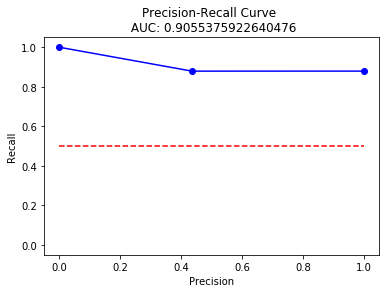

In [26]:
plt.plot(recalls, precisions, "bo")
plt.plot(recalls, precisions, "b-")
plt.plot([0, 1], [0.5, 0.5], "r--")
plt.title("Precision-Recall Curve \n AUC: {}".format(PR_AUC))
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.ylabel("Recall")
plt.xlabel("Precision")
plt.show()